In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import sys
sys.path.insert(0,'/usr/local/lib/python3.9/site-packages')
sys.path

['/usr/local/lib/python3.9/site-packages',
 'C:\\Users\\onkar',
 'C:\\Users\\onkar\\anaconda3\\python312.zip',
 'C:\\Users\\onkar\\anaconda3\\DLLs',
 'C:\\Users\\onkar\\anaconda3\\Lib',
 'C:\\Users\\onkar\\anaconda3',
 '',
 'C:\\Users\\onkar\\anaconda3\\Lib\\site-packages',
 'C:\\Users\\onkar\\anaconda3\\Lib\\site-packages\\win32',
 'C:\\Users\\onkar\\anaconda3\\Lib\\site-packages\\win32\\lib',
 'C:\\Users\\onkar\\anaconda3\\Lib\\site-packages\\Pythonwin']

In [6]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier

# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO 
from sklearn.tree import export_graphviz
!pip install pydotplus
!pip install graphviz
import pydotplus, graphviz

import warnings
warnings.filterwarnings("ignore")

In [10]:
iris = pd.read_csv(r"C:\Users\onkar\Downloads\Iris.csv")
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [12]:
classes = iris['Species'].unique().tolist()
classes

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [14]:
iris.groupby(['Species']).mean()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,25.5,5.006,3.418,1.464,0.244
Iris-versicolor,75.5,5.936,2.770,4.260,1.326
Iris-virginica,125.5,6.588,2.974,5.552,2.026


In [16]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [18]:
# Putting feature variable to X
X = iris.drop('Species',axis=1)

# Putting response variable to y
y = iris['Species']

from sklearn.model_selection import train_test_split
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30,random_state = 99)
X_train.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
10,11,5.4,3.7,1.5,0.2
25,26,5.0,3.0,1.6,0.2
13,14,4.3,3.0,1.1,0.1
131,132,7.9,3.8,6.4,2.0
65,66,6.7,3.1,4.4,1.4


In [20]:
dt_iris = DecisionTreeClassifier()
dt_iris.fit(X_train, y_train)

DecisionTreeClassifier()

In [26]:
y_pred_train = dt_iris.predict(X_train)
print(classification_report(y_train, y_pred_train))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        38
Iris-versicolor       1.00      1.00      1.00        32
 Iris-virginica       1.00      1.00      1.00        35

       accuracy                           1.00       105
      macro avg       1.00      1.00      1.00       105
   weighted avg       1.00      1.00      1.00       105



In [24]:
print(confusion_matrix(y_train,y_pred_train))
print(accuracy_score(y_train,y_pred_train))

[[38  0  0]
 [ 0 32  0]
 [ 0  0 35]]
1.0


In [28]:
y_pred_default = dt_iris.predict(X_test)

print(classification_report(y_test, y_pred_default))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      1.00      1.00        18
 Iris-virginica       1.00      1.00      1.00        15

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [30]:
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[12  0  0]
 [ 0 18  0]
 [ 0  0 15]]
1.0


In [42]:
# Optimise Hyperparameters using Grid GridSearchCV and K-Fold Cross Validation

# Finding optimum max_depth

# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 10)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, cv=n_folds, scoring="accuracy", return_train_score=True)
tree.fit(X_train, y_train)
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003315,0.000722,0.002652,0.002579,1,{'max_depth': 1},0.714286,0.714286,0.714286,0.666667,...,0.695238,0.023328,9,0.690476,0.690476,0.690476,0.702381,0.702381,0.695238,0.005832
1,0.012994,0.004886,0.005619,0.003062,2,{'max_depth': 2},1.000000,0.952381,1.000000,1.000000,...,0.990476,0.019048,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,0.013750,0.003423,0.005122,0.004409,3,{'max_depth': 3},1.000000,0.952381,1.000000,1.000000,...,0.990476,0.019048,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
3,0.006328,0.006753,0.005112,0.006406,4,{'max_depth': 4},1.000000,0.952381,1.000000,1.000000,...,0.990476,0.019048,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,0.003167,0.006334,0.003171,0.006342,5,{'max_depth': 5},1.000000,0.952381,1.000000,1.000000,...,0.990476,0.019048,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


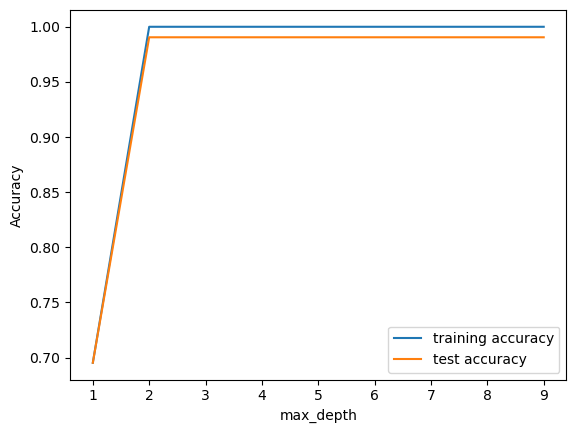

In [40]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [44]:
# Tuning min_samples_leaf
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(1, 40, 3)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
tree.fit(X_train, y_train)
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003754,0.002047,0.000859,0.001192,1,{'min_samples_leaf': 1},1.0,0.952381,1.0,1.0,...,0.990476,0.019048,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,0.007682,0.004059,0.008546,0.004741,4,{'min_samples_leaf': 4},1.0,0.952381,1.0,1.0,...,0.990476,0.019048,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,0.011124,0.006290,0.005865,0.007211,7,{'min_samples_leaf': 7},1.0,0.952381,1.0,1.0,...,0.990476,0.019048,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,0.002812,0.002492,0.005418,0.006074,10,{'min_samples_leaf': 10},1.0,0.952381,1.0,1.0,...,0.990476,0.019048,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,0.000000,0.000000,0.014901,0.003322,13,{'min_samples_leaf': 13},1.0,0.952381,1.0,1.0,...,0.990476,0.019048,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0


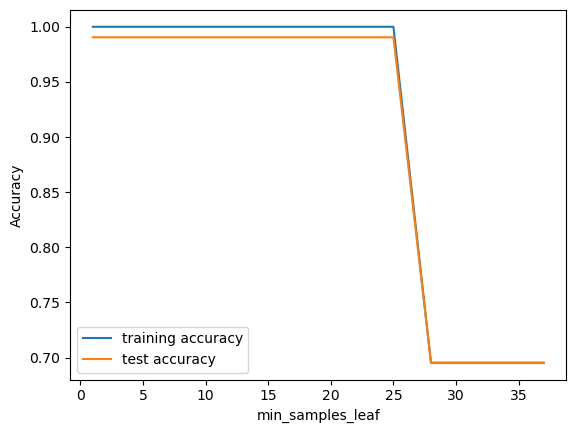

In [46]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [50]:
# Tuning min_samples_split 

# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(3, 40, 3)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, cv=n_folds, scoring="accuracy", return_train_score=True)
tree.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_split': range(3, 40, 3)},
             return_train_score=True, scoring='accuracy')

In [52]:
# Print the results of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001471,0.001964,0.002796,0.002774,3,{'min_samples_split': 3},1.0,0.952381,1.0,1.0,...,0.990476,0.019048,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,0.004784,0.003923,0.009258,0.006927,6,{'min_samples_split': 6},1.0,0.952381,1.0,1.0,...,0.990476,0.019048,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,0.006517,0.007985,0.008906,0.006211,9,{'min_samples_split': 9},1.0,0.952381,1.0,1.0,...,0.990476,0.019048,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,0.004828,0.004100,0.007890,0.007159,12,{'min_samples_split': 12},1.0,0.952381,1.0,1.0,...,0.990476,0.019048,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,0.000000,0.000000,0.002768,0.005537,15,{'min_samples_split': 15},1.0,0.952381,1.0,1.0,...,0.990476,0.019048,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0


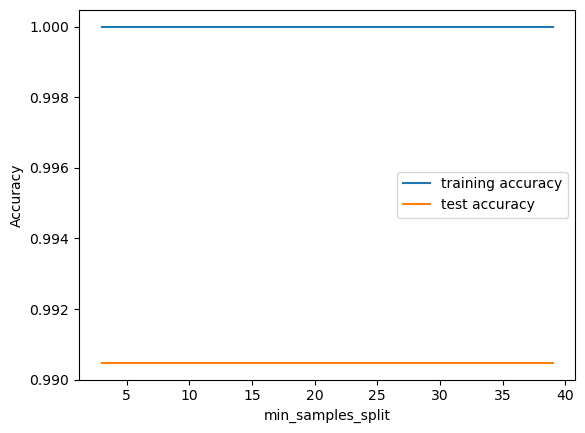

In [54]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# Grid Search to Find Optimal Hyperparameters 

# Create the parameter grid 
param_grid = {
    'max_depth': range(1, 10, 1),
    'min_samples_leaf': range(1, 40, 2),
    'min_samples_split': range(2, 30, 2),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
iristree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = iristree, param_grid = param_grid,  cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 5040 candidates, totalling 25200 fits


In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Define model and parameter grid
model = RandomForestClassifier()
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 5, 10]
}

# Create and run GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X, y)

# Now this will work
print("Best accuracy:", grid_search.best_score_)
print("Best parameters:", grid_search.best_params_)
print("Best model:", grid_search.best_estimator_)

Best accuracy: 0.9666666666666668
Best parameters: {'max_depth': None, 'n_estimators': 10}
Best model: RandomForestClassifier(n_estimators=10)


In [29]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.052791,0.013060,0.003039,0.002884,None,10,"{'max_depth': None, 'n_estimators': 10}",0.966667,0.966667,0.933333,0.966667,1.0,0.966667,0.021082,1
1,0.188570,0.021868,0.012735,0.002709,None,50,"{'max_depth': None, 'n_estimators': 50}",0.966667,0.966667,0.933333,0.866667,1.0,0.946667,0.045216,8
2,0.392038,0.029898,0.013049,0.005612,None,100,"{'max_depth': None, 'n_estimators': 100}",0.966667,0.966667,0.933333,0.933333,1.0,0.960000,0.024944,4
3,0.038414,0.007894,0.006357,0.007786,5,10,"{'max_depth': 5, 'n_estimators': 10}",0.966667,0.966667,0.900000,0.966667,1.0,0.960000,0.032660,3
4,0.202475,0.039107,0.006767,0.008316,5,50,"{'max_depth': 5, 'n_estimators': 50}",0.966667,0.966667,0.933333,0.900000,1.0,0.953333,0.033993,6
5,0.386197,0.032231,0.018477,0.008797,5,100,"{'max_depth': 5, 'n_estimators': 100}",0.966667,0.966667,0.933333,0.933333,1.0,0.960000,0.024944,4
6,0.041558,0.012671,0.005013,0.006558,10,10,"{'max_depth': 10, 'n_estimators': 10}",0.966667,0.966667,0.866667,0.933333,1.0,0.946667,0.045216,8
7,0.191699,0.019235,0.011984,0.006237,10,50,"{'max_depth': 10, 'n_estimators': 50}",0.966667,0.966667,0.933333,0.900000,1.0,0.953333,0.033993,6
8,0.373120,0.015505,0.019379,0.006353,10,100,"{'max_depth': 10, 'n_estimators': 100}",0.966667,0.966667,0.933333,0.966667,1.0,0.966667,0.021082,1


In [31]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.9666666666666668
RandomForestClassifier(n_estimators=10)


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load dataset (if not already loaded)
iris = load_iris()
X = iris.data
y = iris.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [11]:
iristree1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=3,
                       random_state=100)

In [14]:
# accuracy score
iristree1.score(X_test,y_test)

1.0

In [ ]:
from sklearn.tree import export_graphviz
from io import StringIO
import pydotplus
from IPython.display import Image

features = iris.feature_names  # ✅ Define features

dot_data = StringIO()
export_graphviz(
    iristree1, 
    out_file=dot_data,
    feature_names=features,
    filled=True,
    rounded=True
)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [22]:
# tree with max_depth = 3
iristree2 = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=3, 
                                  min_samples_leaf=4,
                                  min_samples_split=4)
iristree2.fit(X_train, y_train)

# score
print(iristree2.score(X_test,y_test))

1.0


In [ ]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(iristree2, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


In [28]:
# Classification Metrix
from sklearn.metrics import classification_report,confusion_matrix
y_pred = iristree1.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [30]:
# Print the Confusion Matrix
print(confusion_matrix(y_test,y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
